## Introduction

Project description:
- **Project Title**: Brazilian E-Commerce - Olist
- **Goal of the project**: The project's goal is to conduct basic analyses on revenue and order trends, the popular product categories, customer and seller performance, as well as delivery time and review scores. Through these analyses, the aim is to provide recommendations for new sellers who wish to enter this online platform. The questions to be answered in this project include:

  *   What product categories should be sold?
  *   Where is the potential market?
  *   When should sales occur?

- **Dataset(s) used**: Brazilian E-Commerce Public Dataset by Olist

Data description:
- **Source(s) of the Data**: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data?select=olist_geolocation_dataset.csv
- **Brief Description of the Data**: The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

Flow of analysis:
1. Import data
2. Preprocess
3. Overview
4. Performance
  4.1 Order and Revenue Trends
  4.2 Product Categories
  4.3 Customers and Sellers Performance
  4.4 Delivery and Review Score
5. Summary and recommendations

## 1.Import data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Olist/olist_orders_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Olist/olist_order_items_dataset.csv')
payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Olist/olist_order_payments_dataset.csv')
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Olist/olist_order_reviews_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Olist/olist_products_dataset.csv')
product_category = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Olist/product_category_name_translation.csv')
customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Olist/olist_customers_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Olist/olist_sellers_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Olist/olist_geolocation_dataset.csv')

Mounted at /content/drive


## 2.Preprocess

In [4]:
# Check info of all datasets

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
# Convert the data type of columns related to time in the orders dataset to datetime
for col in orders.columns[3:]:
  orders[col] = pd.to_datetime(orders[col])

In [7]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [11]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [14]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
# Check null value
# order_items, payments, product_category, customers, sellers, geolocation.isna().sum() = 0

In [16]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [17]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [18]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [19]:
# Check duplicated value
# orders, order_items, payments, reviews, products, product_category, customers, sellers.duplicated().sum() = 0

In [20]:
geolocation.duplicated().sum()

261831

## 3.Overview

In [21]:
# Total number of orders
orders['order_id'].count()

99441

In [22]:
# Total number of unique customers
customers['customer_unique_id'].nunique()

96096

In [23]:
# Total number of sellers
sellers['seller_id'].nunique()

3095

In [24]:
# Total number of products
products['product_id'].nunique()

32951

In [25]:
# Total number of product categories
products['product_category_name'].nunique()

73

In [26]:
# Total number of product categories in english
product_category['product_category_name_english'].nunique()

71

In [27]:
# Find 2 missing product categories
products[~products['product_category_name'].isin(product_category['product_category_name'].unique())]['product_category_name'].value_counts()

portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: product_category_name, dtype: int64

In [28]:
# Add 2 missing product categories, then merge the 2 datasets for products and product_category
adding_rows = [{'product_category_name':'portateis_cozinha_e_preparadores_de_alimentos','product_category_name_english':'kitchen_laptops_and_food_preparators'},
                 {'product_category_name':'pc_gamer','product_category_name_english':'pc_gamer'}]
product_category = product_category.append(adding_rows,ignore_index=True)
products = (products.merge(product_category, on = ['product_category_name'], how = 'left'))

<ipython-input-28-6e2b0a2d03c1>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  product_category = product_category.append(adding_rows,ignore_index=True)


In [29]:
# Total number of reviews
reviews['review_id'].count()

99224

In [30]:
# The average of review score
reviews['review_score'].mean()

4.08642062404257

In [31]:
# The number of payment type
payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [32]:
# Merge dataset
merge_data = (orders
                .merge(order_items, on = ['order_id'], how = 'left')
                .merge(reviews, on = ['order_id'], how = 'left')
                .merge(payments, on = ['order_id'], how = 'left')
                .merge(products, on = ['product_id'], how = 'left')
                .merge(sellers, on = ['seller_id'], how = 'left')
                .merge(customers, on = ['customer_id'], how = 'left'))

## 4.Performance

### 4.1 Order and Revenue Trends

In [33]:
# Create new columns that convert timestamps from the 'order_purchase_timestamp' column into month-year, year, day of month, day of week and hour of day
merge_data['purchase_month_year'] = merge_data['order_purchase_timestamp'].dt.to_period('M')
merge_data['purchase_year'] = merge_data['order_purchase_timestamp'].dt.year
merge_data['order_dayofmonth'] = merge_data['order_purchase_timestamp'].dt.day
merge_data['order_dayofweek'] = merge_data['order_purchase_timestamp'].dt.dayofweek
merge_data['order_hour'] = merge_data['order_purchase_timestamp'].dt.hour

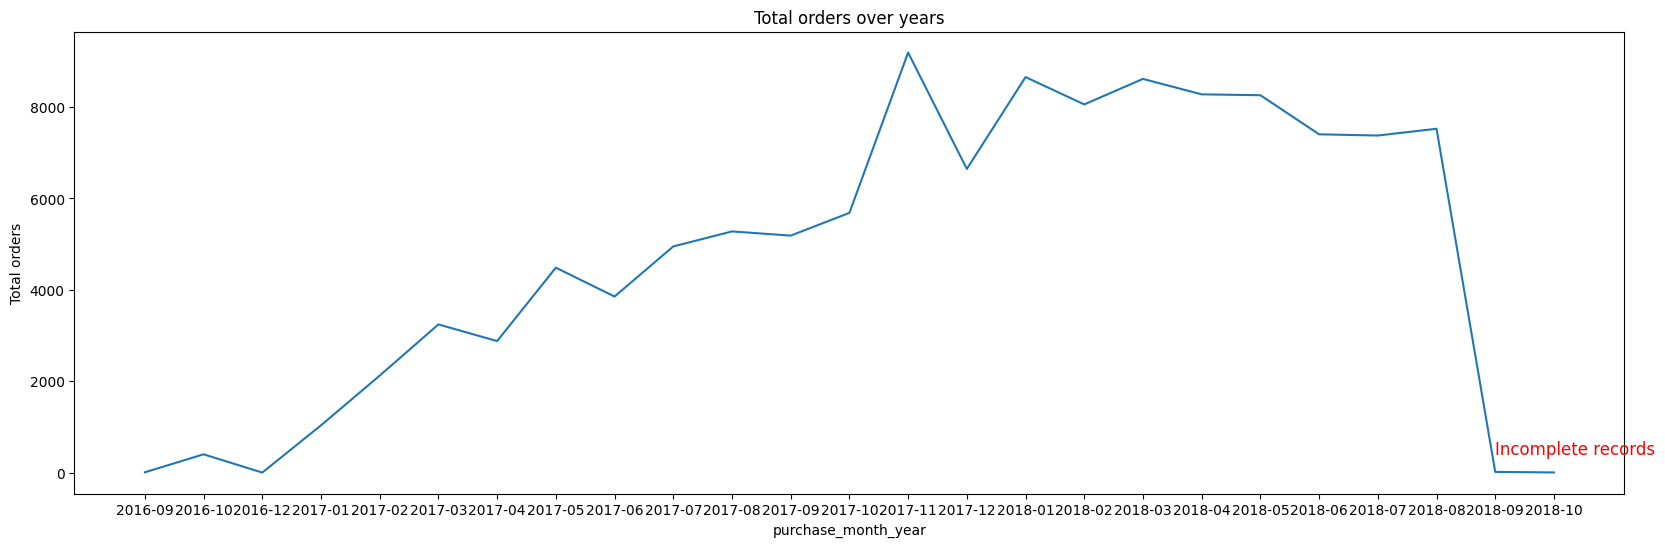

In [34]:
# Total orders over years
order_by_years = merge_data.groupby('purchase_month_year')['order_id'].count().reset_index()
order_by_years['purchase_month_year'] = order_by_years['purchase_month_year'].astype('str')
plt.figure(figsize=(20, 6))

sns.lineplot(data=order_by_years, x='purchase_month_year', y="order_id")
plt.title("Total orders over years")
plt.ylabel("Total orders")

plt.text(
    x='2018-09',
    y=400,
    s="Incomplete records",
    ha="left",
    fontsize="large",
    color="red",
)
plt.show()

In [35]:
# Total orders in 9/2018
merge_data[merge_data['purchase_month_year']=='2018-09']['order_id'].nunique()

16

In [36]:
# Total orders in 10/2018
merge_data[merge_data['purchase_month_year']=='2018-10']['order_id'].nunique()

4

In [37]:
#  Sum of orders in 9/2018 and 10/2018 / total orders in the database
print(round((merge_data[merge_data['purchase_month_year']=='2018-09']['order_id'].nunique() + merge_data[merge_data['purchase_month_year']=='2018-10']['order_id'].nunique()) / merge_data['order_id'].nunique() * 100,2),'%')

0.02 %


The total number of orders began to increase sharply from November 2017 and continued to rise steadily until August 2018. However, there was a decrease in September 2018 due to incomplete records.

According to the data records, the number of orders in September 2018 and October 2018 is very low, accounting for only 0.02% of the total orders in the database. Consequently, this portion of the data is excluded, and our analysis will focus solely on the remaining dataset.







In [38]:
merge_data = merge_data[merge_data['purchase_month_year'] != '2018-09']
merge_data = merge_data[merge_data['purchase_month_year'] != '2018-10']

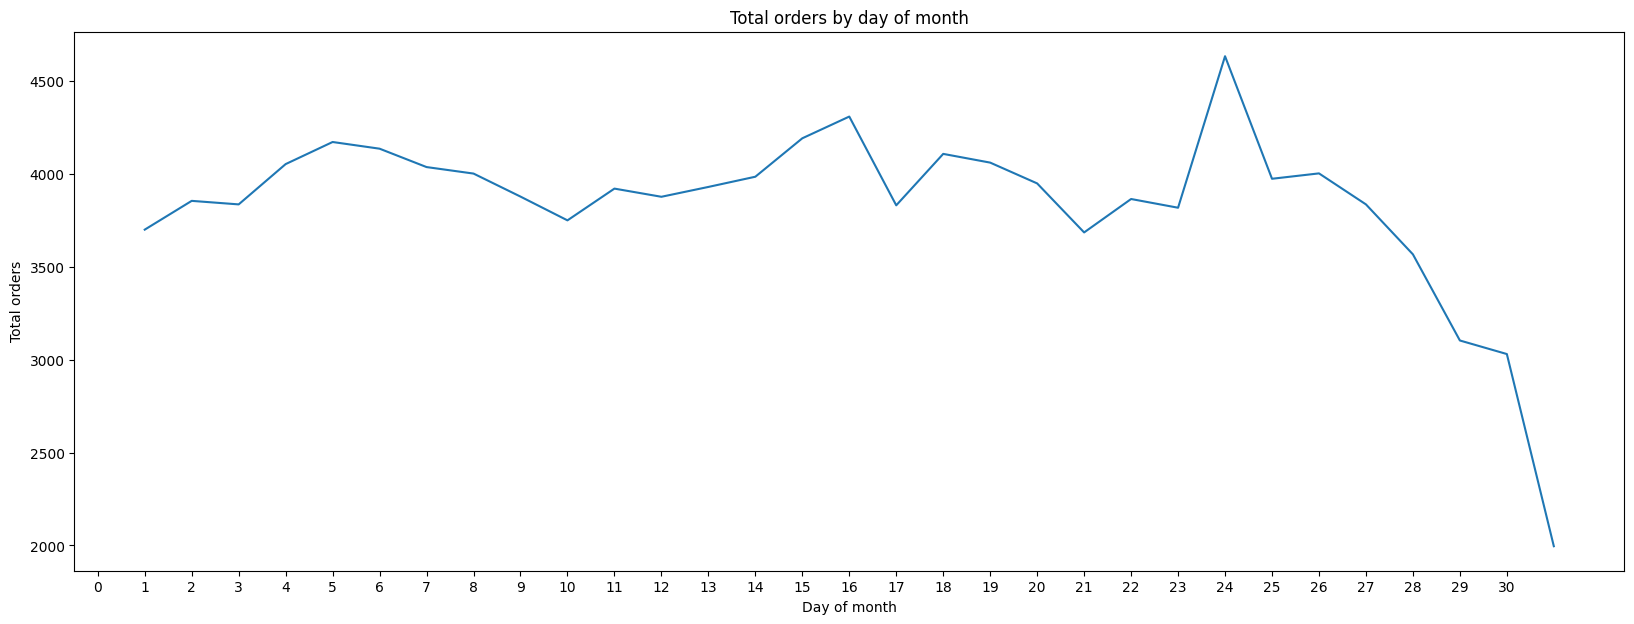

In [39]:
# Total orders by day of month
order_by_dayofmonth = merge_data.groupby('order_dayofmonth')['order_id'].count().reset_index()
plt.figure(figsize = (20,7))
sns.lineplot(data = order_by_dayofmonth,
             x = 'order_dayofmonth',
             y = 'order_id')
plt.title("Total orders by day of month")
plt.xlabel('Day of month')
plt.ylabel('Total orders')
plt.xticks(np.arange(0,31, step = 1))
plt.show()

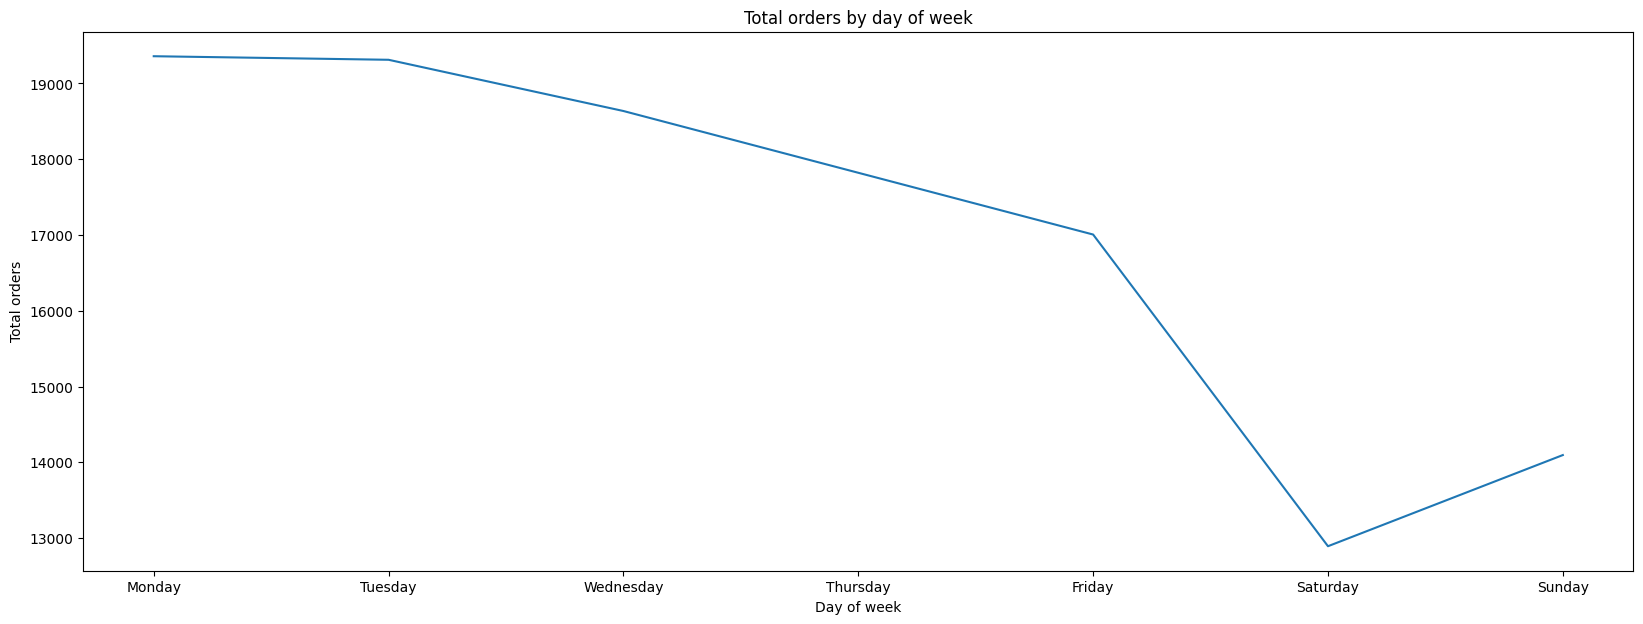

In [40]:
# Total orders by day of week: 0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday , 5 = Saturday, 6 = Sunday
order_by_dayofweek = merge_data.groupby('order_dayofweek')['order_id'].count().reset_index()
plt.figure(figsize = (20,7))
sns.lineplot(data = order_by_dayofweek,
             x = 'order_dayofweek',
             y = 'order_id')
plt.title("Total orders by day of week")
plt.xlabel('Day of week')
plt.ylabel('Total orders')
plt.xticks(ticks = [0,1,2,3,4,5,6],
           labels = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday'])
plt.show()

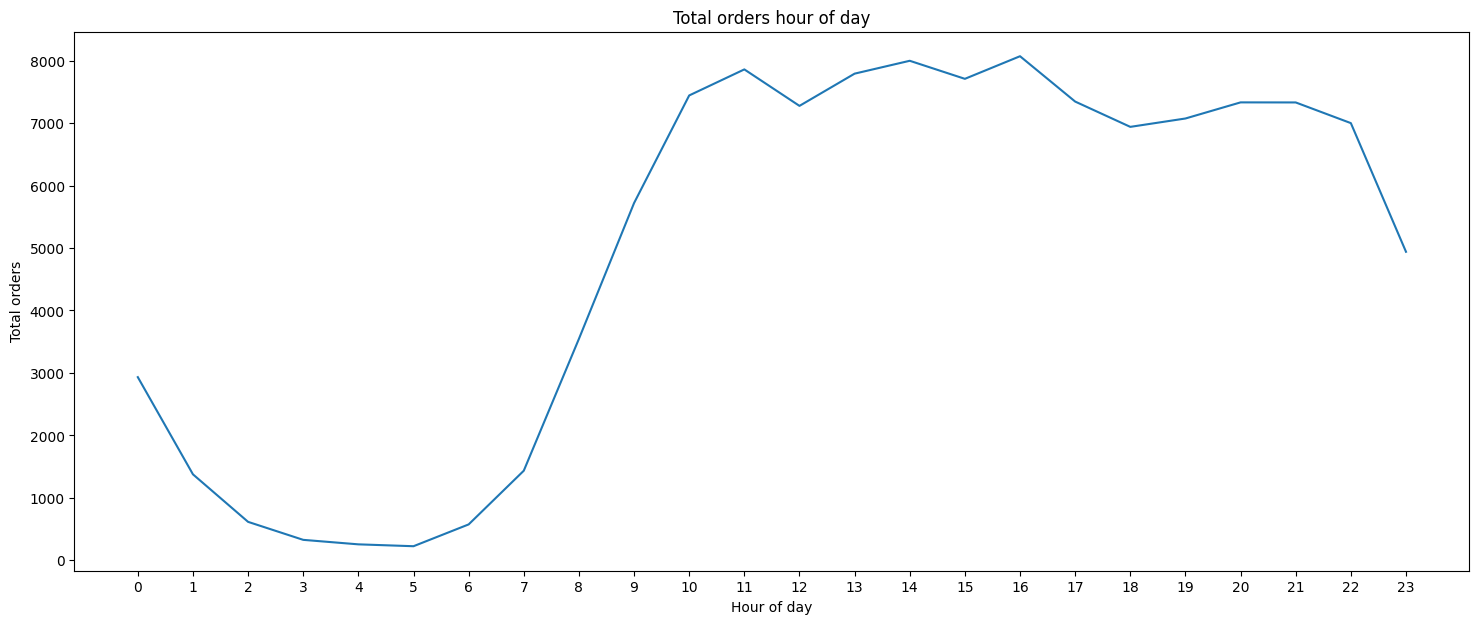

In [41]:
# Total orders by hour of a day
order_by_hour = merge_data.groupby('order_hour')['order_id'].count().reset_index()
plt.figure(figsize = (18,7))
sns.lineplot(data = order_by_hour,
             x = 'order_hour',
             y = 'order_id')
plt.title("Total orders hour of day")
plt.xlabel('Hour of day')
plt.ylabel('Total orders')
plt.xticks(np.arange(0,24, step = 1))
plt.show()

Based on 3 charts above, it can be seen that orders remain relatively stable throughout the month, reaching a peak on the 24th and then sharply decreasing towards the month's end. Additionally, the number of orders tends to increase on weekdays and decrease on weekends. Notably, the highest number of orders is observed between 10 am and 10 pm.








In [42]:
# Create two new columns that convert the timestamps in the column 'order_approved_at' to month_year and year
merge_data['approved_month_year'] = merge_data['order_approved_at'].dt.to_period('M')
merge_data['approved_year'] = merge_data['order_approved_at'].dt.year

Text(0.5, 1.0, 'Total revenue over years')

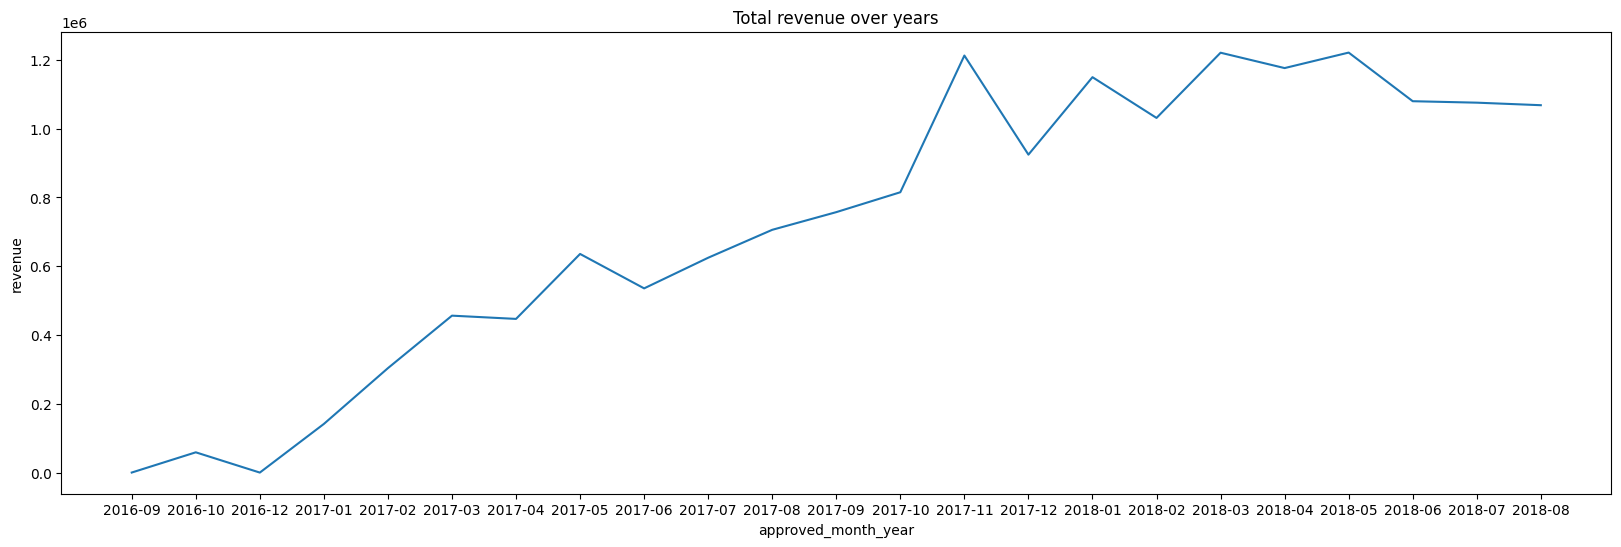

In [43]:
# Total revenue over years
merge_data['revenue'] = merge_data['price'] + merge_data['freight_value']
revenue = merge_data.groupby('approved_month_year')['revenue'].sum().reset_index()
revenue['approved_month_year'] = revenue['approved_month_year'].astype('str')
plt.figure(figsize=(20, 6))

sns.lineplot(data=revenue, x='approved_month_year', y="revenue")
plt.title("Total revenue over years")

Like the orders, the total revenue also started to increase sharply from November 2017 and continued to rise steadily until August 2018.

Therefore, we analyzed the number of orders on a daily basis in November 2017 to gather more information about why the orders experienced a sharp increase

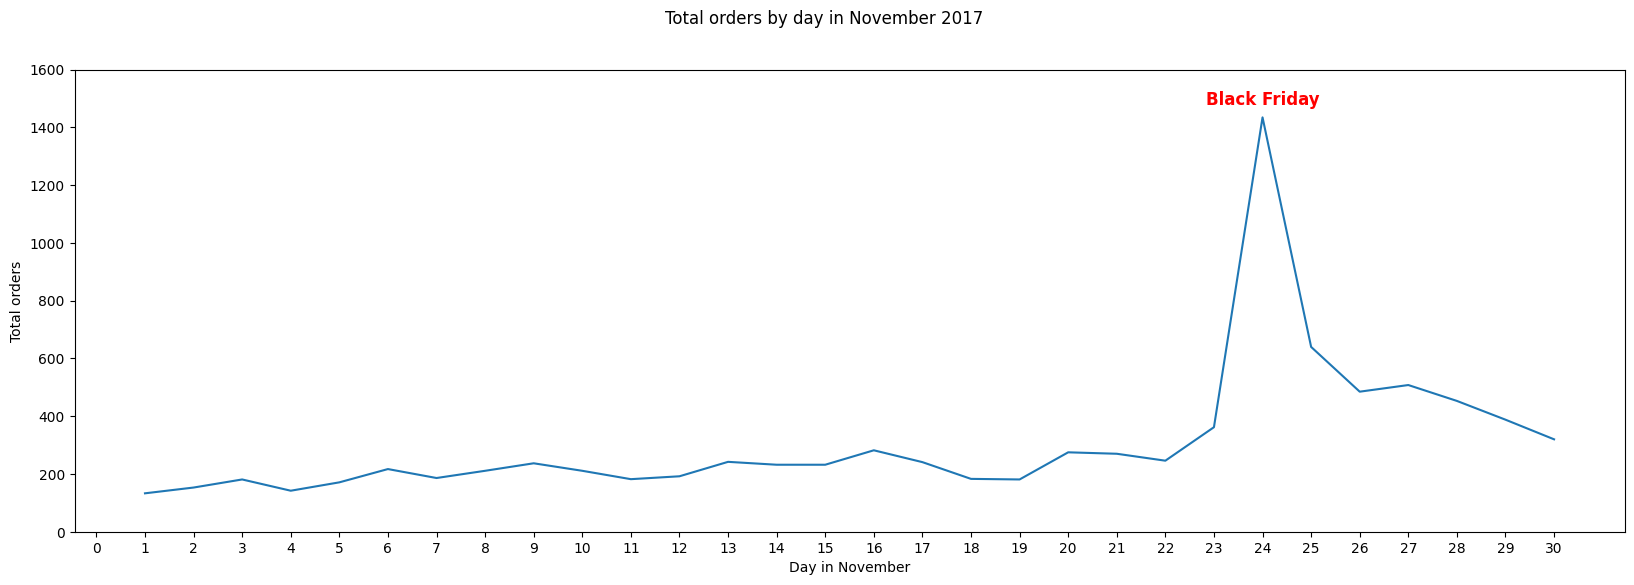

In [44]:
total_order_day_month = merge_data.groupby(['purchase_month_year','order_dayofmonth'])['order_id'].count().reset_index()
plt.figure(figsize = (20,6))
sns.lineplot(data = total_order_day_month[total_order_day_month['purchase_month_year'] == '2017-11'],
             x = 'order_dayofmonth',
             y = 'order_id')
plt.suptitle("Total orders by day in November 2017")
plt.xlabel('Day in November')
plt.ylabel('Total orders')
plt.xticks(np.arange(0,31, step = 1))
plt.yticks(np.arange(0,1800, step = 200))
plt.text(24, 1480, 'Black Friday', ha='center',fontsize='large', fontweight='bold', color='red')
plt.show()

Based on the chart, the number of orders rapidly increased on 24/11/2017 and the subsequent days.

24/11/2017 was Black Friday, which served as the key promotional campaign for Olist in 2017.

In the following days, the promotion continued until Cyber Monday, resulting in the number of orders remaining higher than the number of orders on regular days.

### 4.2 Product Categories

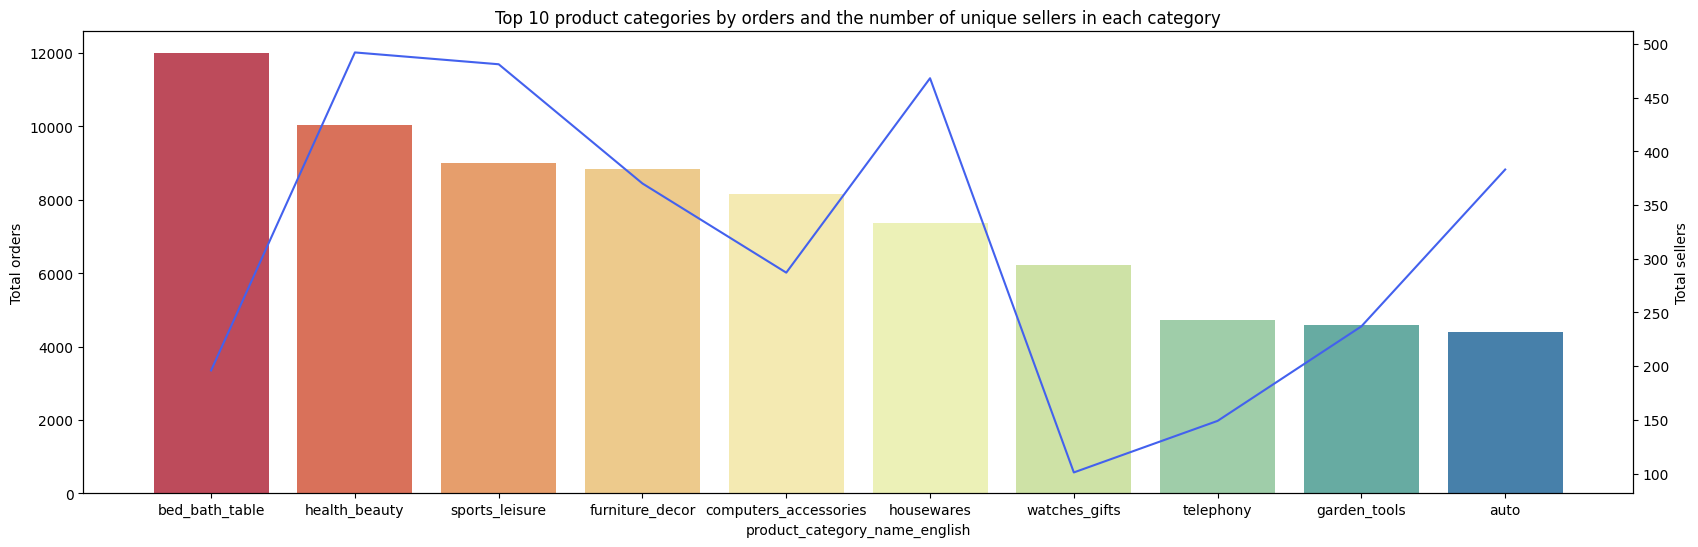

In [99]:
# Top 10 product categories by orders and the number of unique sellers in each category
product_categories_by_customers = merge_data.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False).reset_index().head(10)
top10_productcate_by_customers = product_categories_by_customers['product_category_name_english']
sellers_productcate2 = merge_data[merge_data.product_category_name_english.isin(top10_productcate_by_customers)].groupby('product_category_name_english')['seller_id'].nunique().reset_index()
merge_product_order = (product_categories_by_customers
                .merge(sellers_productcate2, on = ['product_category_name_english'], how = 'left'))
plt.figure(figsize=(20, 6))
sns.set_palette('Spectral', 10)
sns.barplot(data=merge_product_order, x='product_category_name_english', y='order_id')
plt.ylabel('Total orders')
plt.twinx()
sns.lineplot(data=merge_product_order, x='product_category_name_english', y='seller_id', color = '#4361EE')
plt.ylabel('Total sellers')
plt.title("Top 10 product categories by orders and the number of unique sellers in each category")
plt.show()

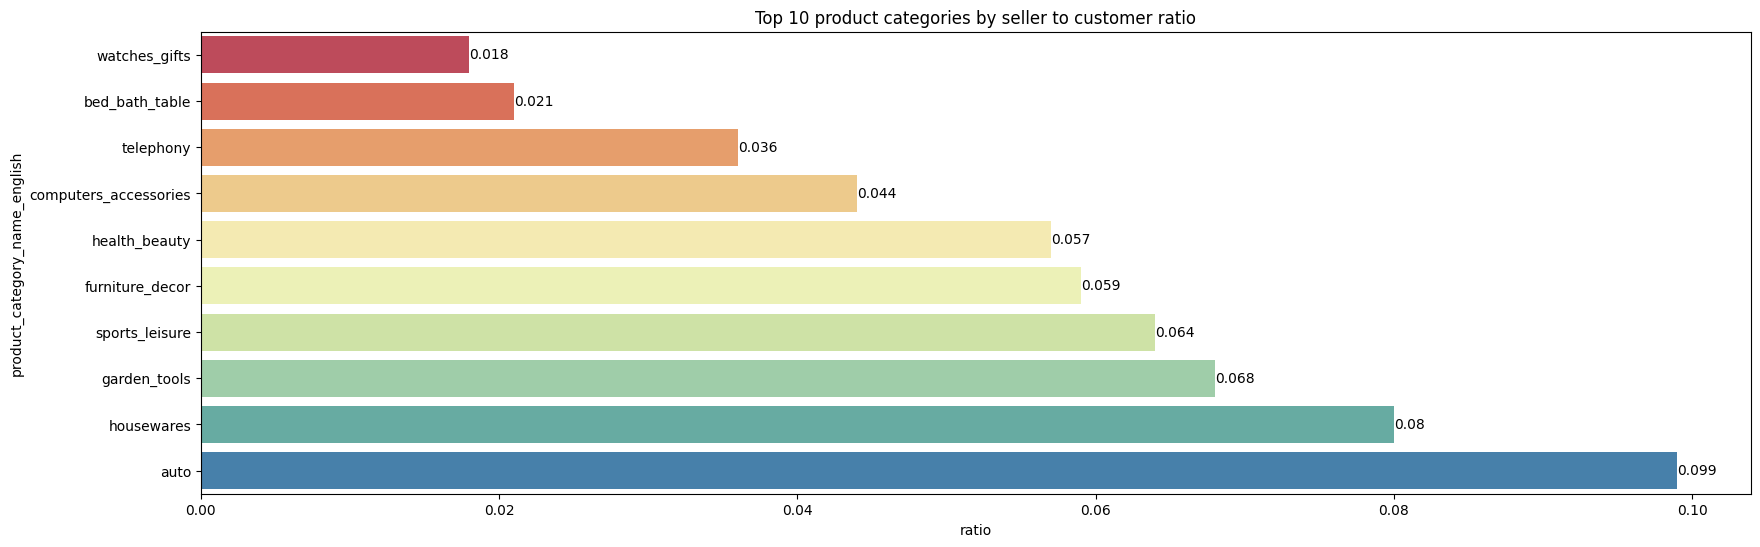

In [80]:
# Top 10 product categories by seller to customer ratio
top10_productcate_by_customers = product_categories_by_customers['product_category_name_english']
sellers_product_category = merge_data[merge_data.product_category_name_english.isin(top10_productcate_by_customers)].groupby('product_category_name_english')['seller_id'].nunique().reset_index()
customers_product_category = merge_data[merge_data.product_category_name_english.isin(top10_productcate_by_customers)].groupby('product_category_name_english')['customer_unique_id'].nunique().reset_index()
merge_product_order = (product_categories_by_customers
                .merge(sellers_product_category, on = ['product_category_name_english'], how = 'left')
                .merge(customers_product_category, on = ['product_category_name_english'], how = 'left'))
merge_product_order['ratio'] = round(merge_product_order['seller_id'] / merge_product_order['customer_unique_id'],3)
merge_product_order = merge_product_order.sort_values(by='ratio',ascending=True)

plt.figure(figsize=(20, 6))

plot = sns.barplot(data=merge_product_order, x='ratio', y='product_category_name_english')
plt.title("Top 10 product categories by seller to customer ratio")
for i in plot.containers:
    plot.bar_label(i,)
plt.show()

Based on the two charts above, it can be seen that he product categories 'bed_bath_table' and 'watches_gifts' are popular, each with a relatively small number of sellers.

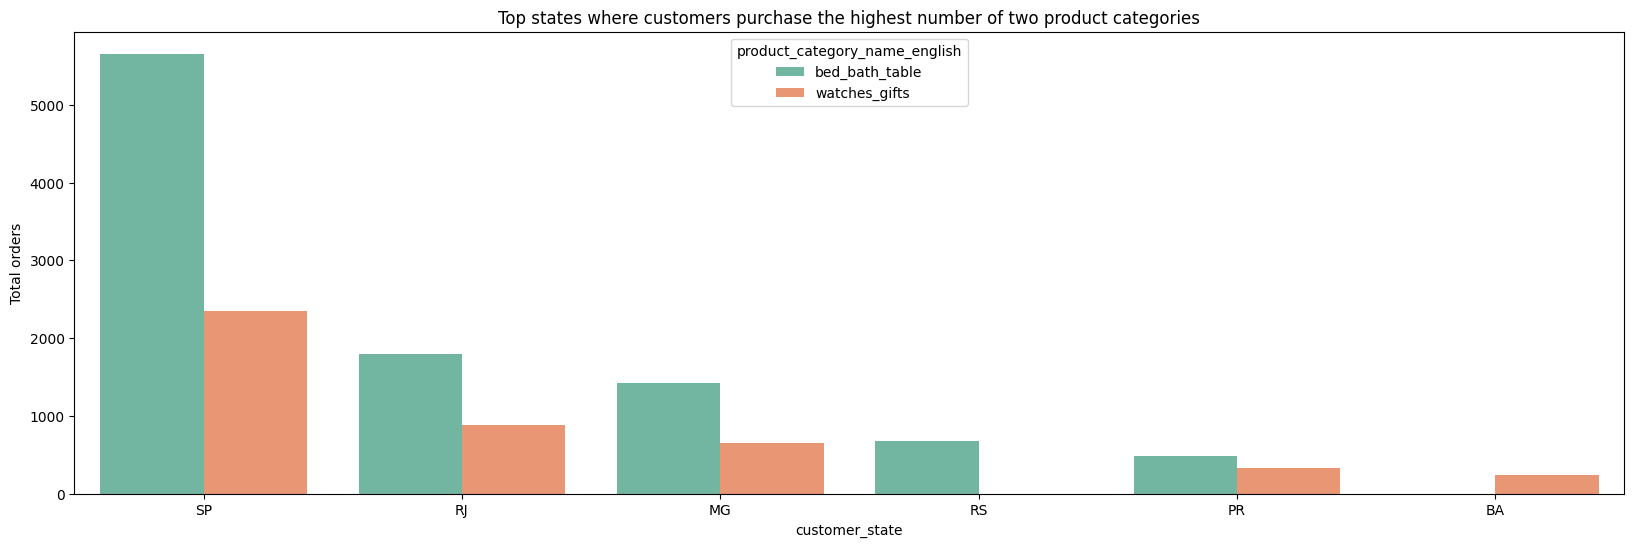

In [85]:
# The top states where customers purchase the highest number of two product categories
top2_product = merge_data[merge_data['product_category_name_english'].isin(['bed_bath_table','watches_gifts'])]
top_product_state = top2_product.groupby(['product_category_name_english','customer_state'])['order_id'].count().reset_index().sort_values(by=['product_category_name_english','order_id'], ascending=[True, False])
top5_product_state = top_product_state.groupby('product_category_name_english').head(5)

plt.figure(figsize=(20, 6))

sns.barplot(data=top5_product_state, x='customer_state', y='order_id', hue='product_category_name_english',palette='Set2')
plt.ylabel('Total orders')
plt.title("Top states where customers purchase the highest number of two product categories")
plt.show()

SP, RJ, MG are the top states where customers tend to purchase the highest number of two product categories 'bed_bath_table' and 'watches_gifts'

In [48]:
# Review scores given by customers for two specific product categories
top2_product.groupby('product_category_name_english')['review_score'].agg(['mean','count'])

,mean,count
product_category_name_english,,
bed_bath_table,3.890605,11847
watches_gifts,4.017692,6161


Given that the review score is not very high, further analysis is being conducted to identify which factors may be influencing it

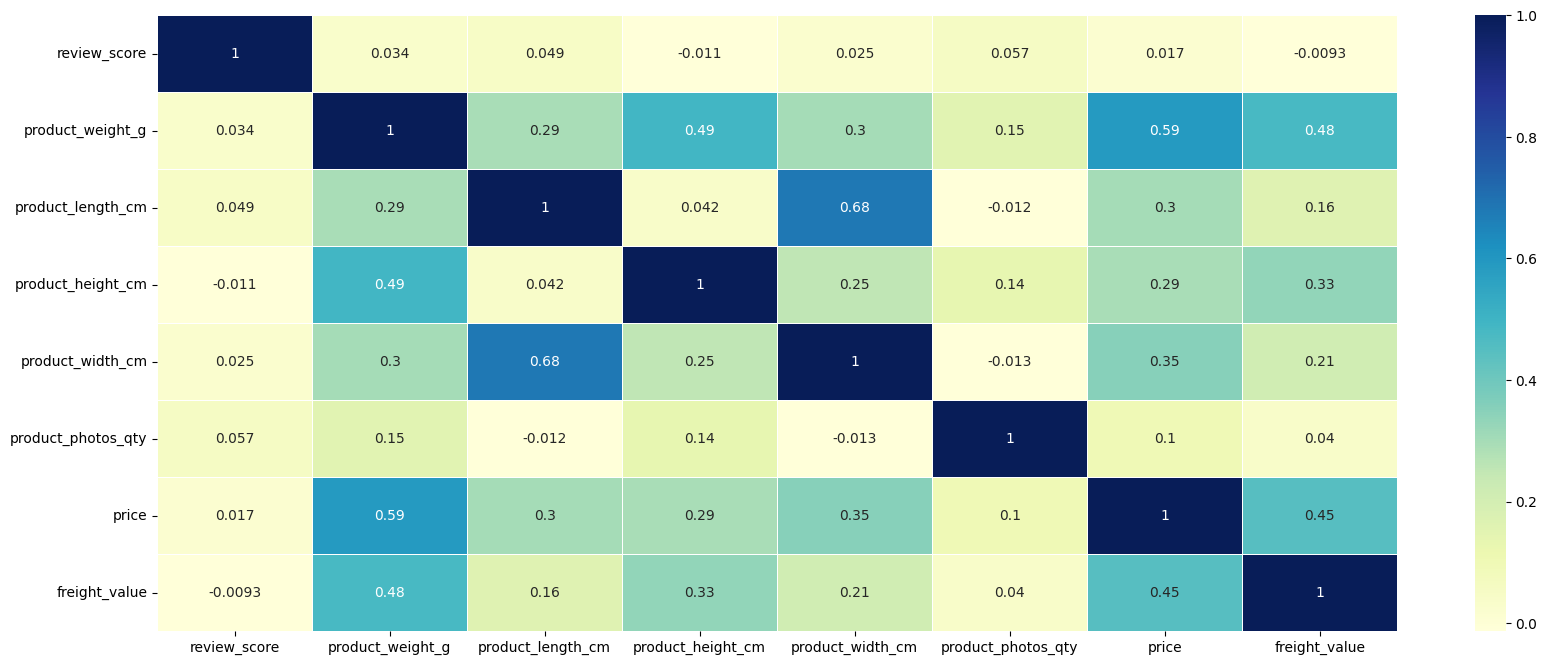

In [49]:
Bed_bath_table = top2_product[top2_product['product_category_name_english'] == 'bed_bath_table']
plt.figure(figsize=(20, 8))
sns.heatmap(Bed_bath_table[['review_score','product_weight_g','product_length_cm','product_height_cm','product_width_cm','product_photos_qty','price','freight_value']].corr(), annot=True, cmap="YlGnBu", linewidths=.5)
plt.yticks(rotation='horizontal')
plt.show()

While there appears to be insufficient information to draw conclusive insights about the factors influencing the review score for beth_bath_table, an observable proportional correlation exists between the price and other factors  such as product weight, freight cost, and product dimensions.

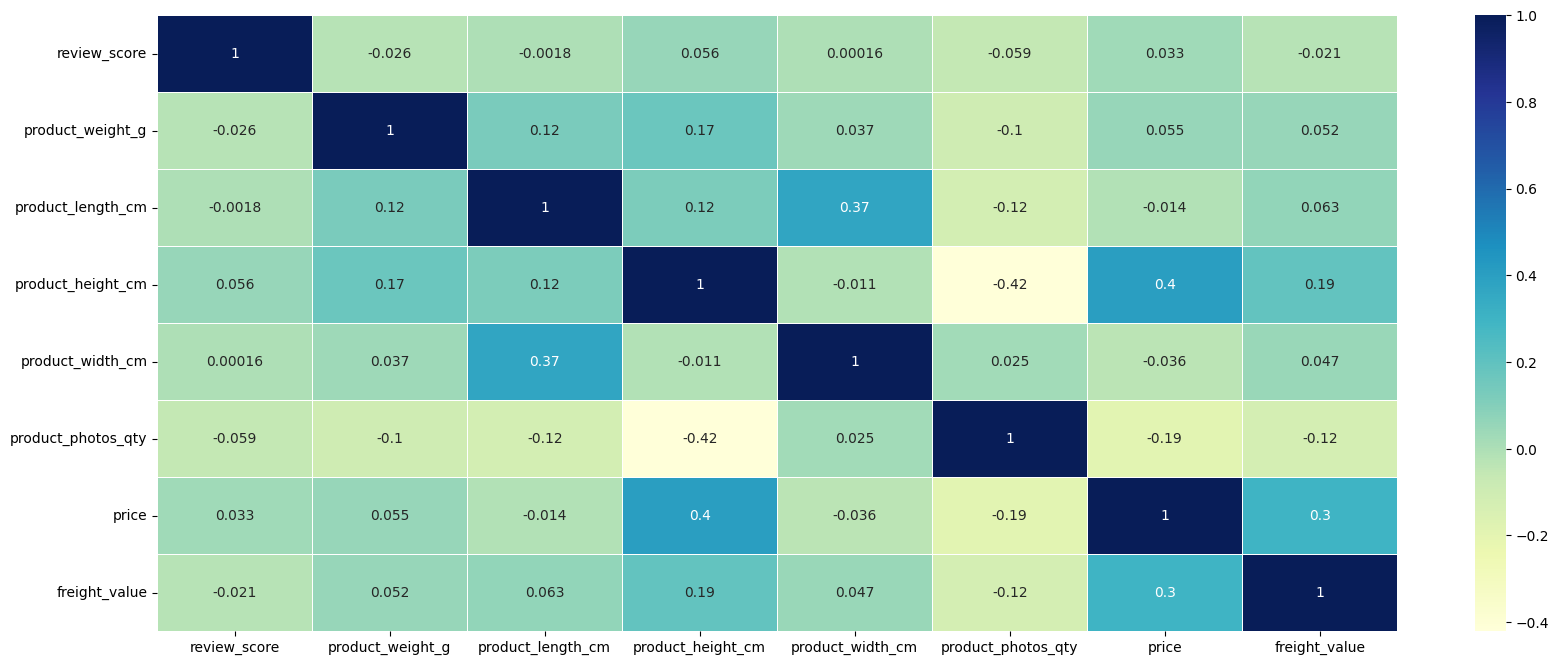

In [50]:
Watches_gifts = top2_product[top2_product['product_category_name_english'] == 'watches_gifts']
plt.figure(figsize=(20, 8))
sns.heatmap(Watches_gifts[['review_score','product_weight_g','product_length_cm','product_height_cm','product_width_cm','product_photos_qty','price','freight_value']].corr(), annot=True, cmap="YlGnBu", linewidths=.5)
plt.yticks(rotation='horizontal')
plt.show()

Insufficient information is available to draw definitive insights into the factors influencing the review score for watch gifts

### 4.3 Customers and Sellers Performance

In [51]:
# Top 10 states with the highest seller count
sellers_state = merge_data.groupby('seller_state')['seller_id'].nunique().sort_values(ascending=False).reset_index().head(10)

In [52]:
# Top 10 states with the highest customer count
customers_state = merge_data.groupby('customer_state')['customer_unique_id'].nunique().sort_values(ascending=False).reset_index().head(10)
top10_states_by_customers = customers_state['customer_state']
customers_state = customers_state.rename(columns = {'customer_state':'state','customer_unique_id': 'count_id'})
customers_state['type'] = 'customer'

In [53]:
# Count the sellers in the top 10 states with the highest customer count
sellers_topstates = merge_data[merge_data.seller_state.isin(top10_states_by_customers)].groupby('seller_state')['seller_id'].nunique().reset_index()
sellers_topstates = sellers_topstates.rename(columns = {'seller_state':'state','seller_id': 'count_id'})
sellers_topstates['type'] = 'seller'

In [88]:
# The ratio of sellers to customers in the top 10 states with the highest customer count
df = pd.concat([customers_state, sellers_topstates])
state_counts = pd.pivot_table(data=df, index='state', columns='type', values='count_id', aggfunc='sum')
state_counts['seller_ratio'] = round(state_counts['seller'] / state_counts['customer'],3)
state_counts = state_counts.sort_values(by='seller_ratio',ascending=True).reset_index()

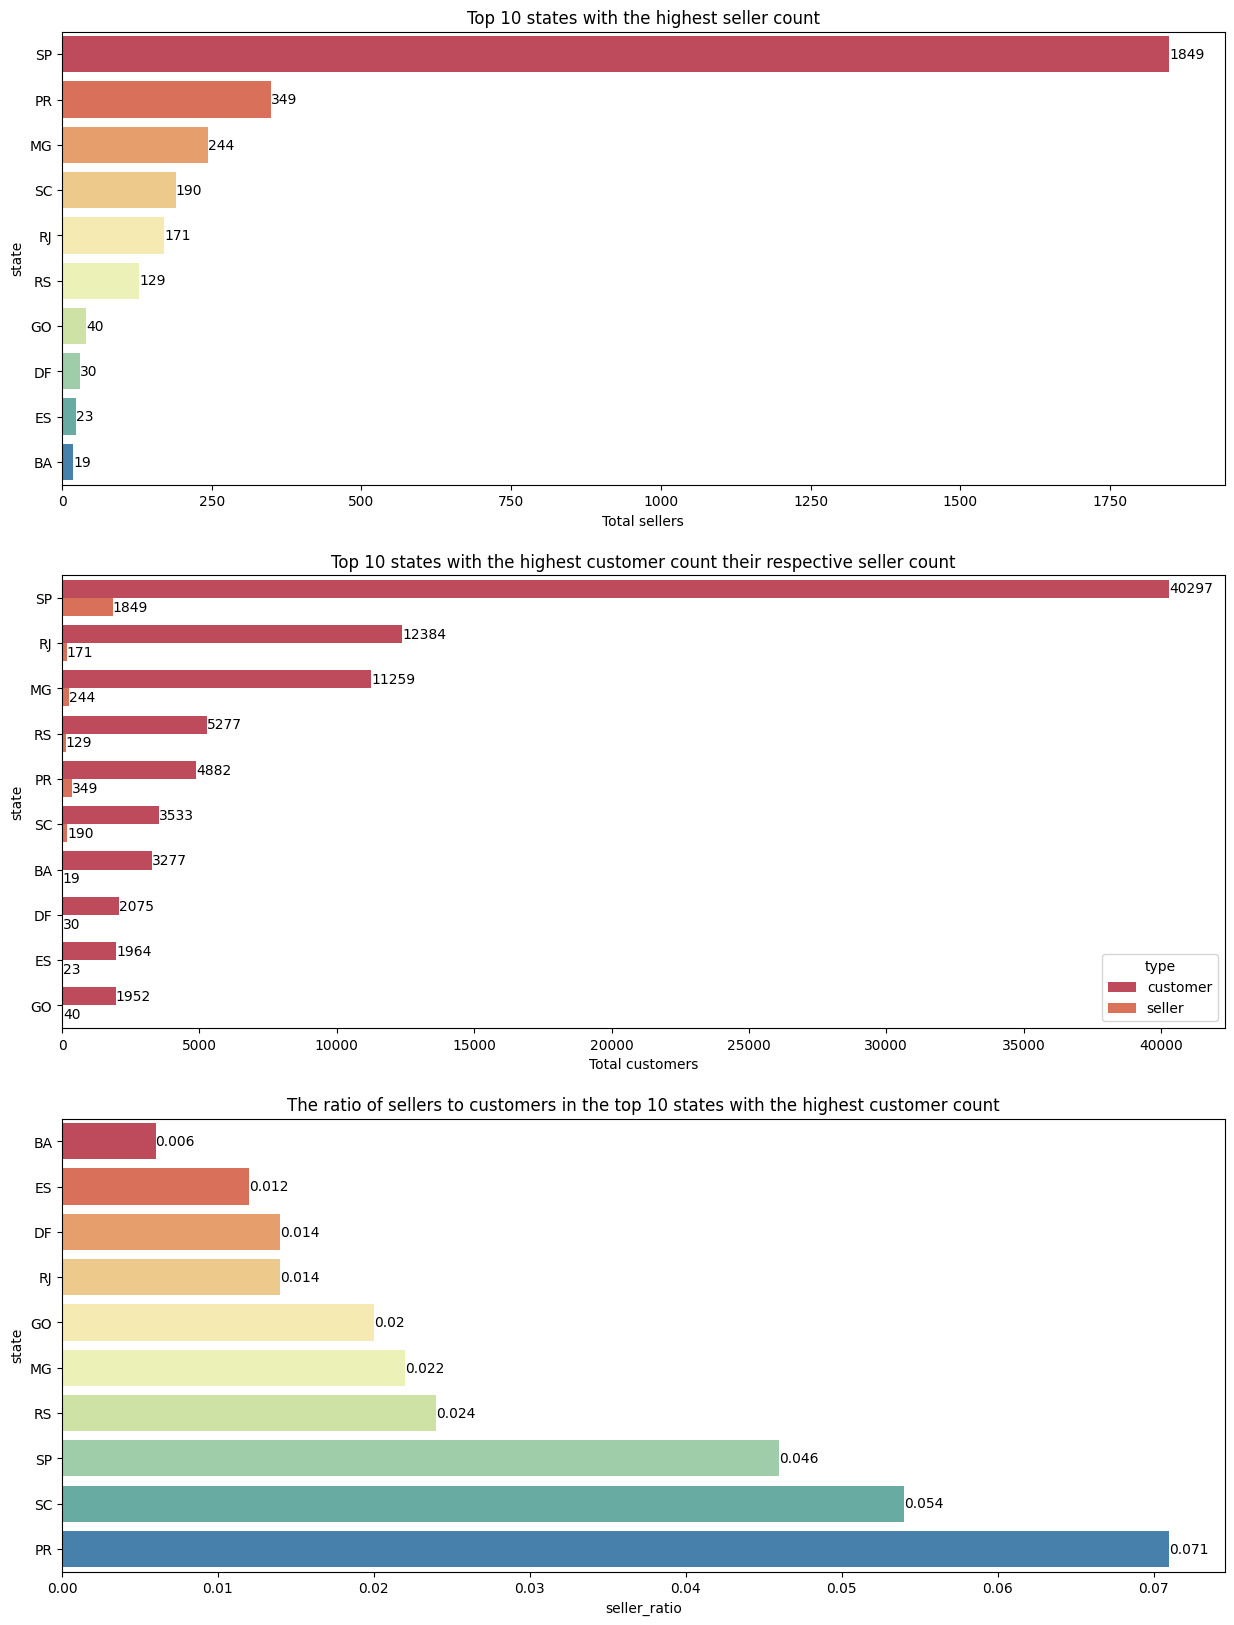

In [89]:
plt.figure(figsize=(15, 20))

plt.subplot(311)
bar_plot1 = sns.barplot(data=sellers_state, x='seller_id', y='seller_state')
plt.xlabel('Total sellers')
plt.ylabel('state')
plt.title('Top 10 states with the highest seller count')
for i in bar_plot1.containers:
    bar_plot1.bar_label(i,)

plt.subplot(312)
bar_plot2 = sns.barplot(data=df, x='count_id', y='state', hue='type')
plt.xlabel('Total customers')
plt.title('Top 10 states with the highest customer count their respective seller count')
for i in bar_plot2.containers:
    bar_plot2.bar_label(i,)

plt.subplot(313)
bar_plot3 = sns.barplot(data=state_counts, x='seller_ratio', y='state')
plt.title("The ratio of sellers to customers in the top 10 states with the highest customer count")
for i in bar_plot3.containers:
    bar_plot3.bar_label(i,)

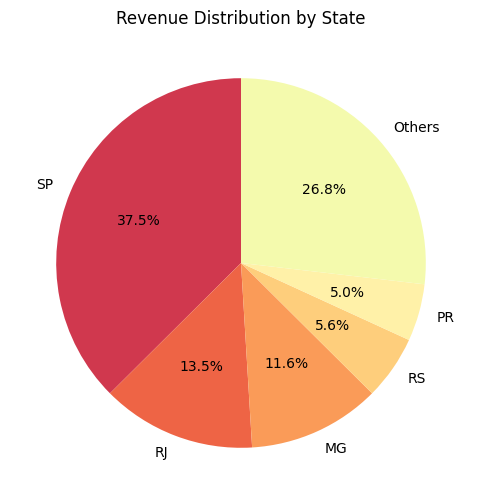

In [56]:
# Revenue Distribution by State
revenue_by_state = merge_data.groupby('customer_state')['revenue'].sum().reset_index().sort_values(by='revenue',ascending=False)
top_5_states = revenue_by_state.head(5)
other_states_revenue = revenue_by_state.iloc[5:]['revenue'].sum()
plot_data = pd.concat([top_5_states, pd.DataFrame({'customer_state': ['Others'], 'revenue': [other_states_revenue]})])
plot_data['revenue_percentage'] = (plot_data['revenue'] / plot_data['revenue'].sum()) * 100

plt.figure(figsize=(6, 6))
plt.pie(plot_data['revenue_percentage'], labels=plot_data['customer_state'], autopct='%1.1f%%', startangle=90)
plt.title('Revenue Distribution by State')
plt.show()

Most customers and sellers are concentrated in SP state and SP state accounts for the highest revenue share. The ratio of sellers to customers in SP state is also relatively low. Thus, SP state remains a potential market for new sellers to enter.
Additionally, 'RJ state and MG state are also potential markets that garner attention.

Text(0.5, 1.0, 'Total unique customers by month-year')

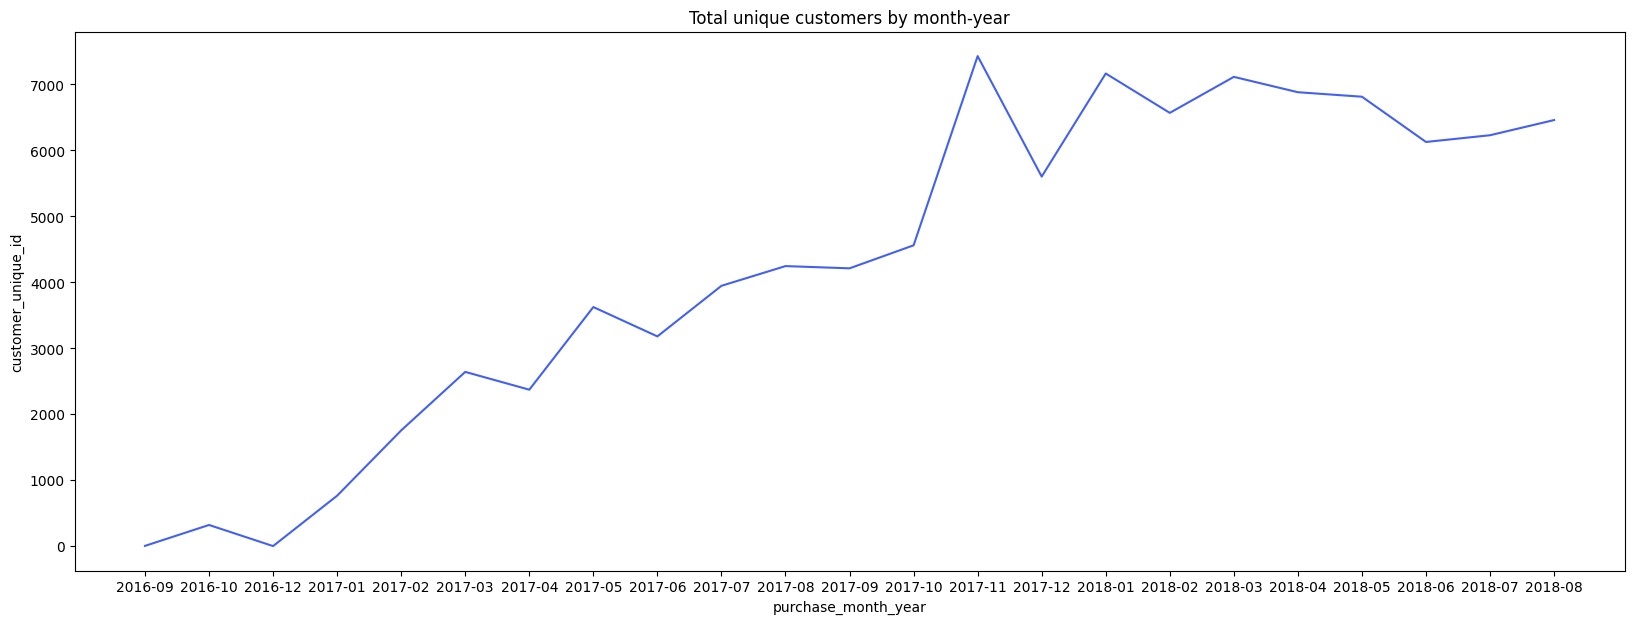

In [98]:
# Total customers by year-months
cus_month_year = merge_data.groupby('purchase_month_year')['customer_unique_id'].nunique().reset_index()
cus_month_year['purchase_month_year'] = cus_month_year['purchase_month_year'].astype('str')
plt.figure(figsize = (20,7))
sns.lineplot(data = cus_month_year,
             x = 'purchase_month_year',
             y = 'customer_unique_id',
             color = '#4361EE')
plt.title("Total unique customers by month-year")

In November 2017, there was a substantial increase in the number of customers. The question is: what percentage of these entries corresponds to existing customers, and what percentage belongs to new customers?

In [58]:
# Create 'customer type' column
new_min_purchase = merge_data.groupby('customer_unique_id')['purchase_month_year'].min().reset_index()
new_min_purchase.columns = ['customer_unique_id','min_purchase_month_year']
new_cus = pd.merge(merge_data, new_min_purchase, on = 'customer_unique_id')
new_cus['customer_type'] = 'New'
new_cus.loc[new_cus['purchase_month_year'] > new_cus['min_purchase_month_year'],'customer_type'] = 'Existing'

Text(0.5, 1.0, 'Type of customers by year month')

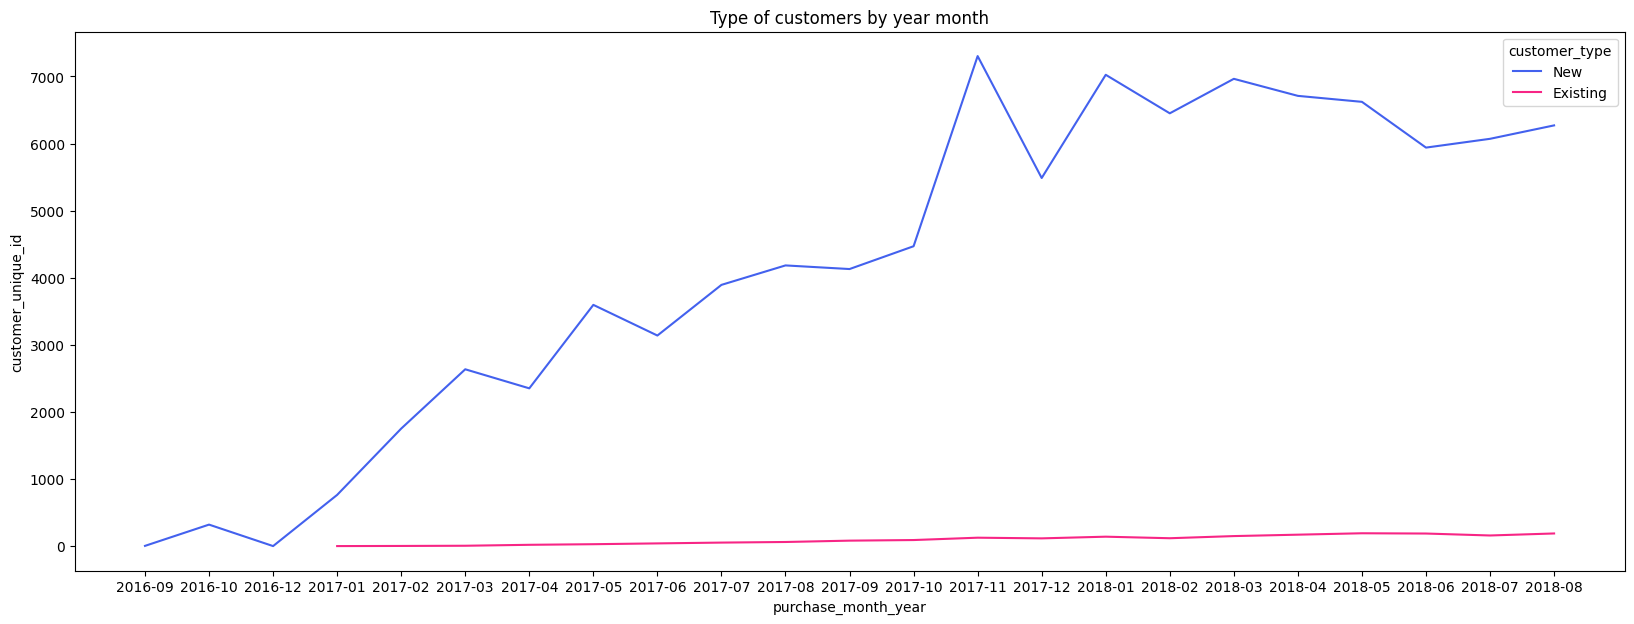

In [97]:
# Type of customers by year month
type_cus_month_year = new_cus.groupby(['purchase_month_year','customer_type'],)['customer_unique_id'].nunique().reset_index()
type_cus_month_year['purchase_month_year'] = type_cus_month_year['purchase_month_year'].astype('str')
plt.figure(figsize = (20,7))
sns.lineplot(data = type_cus_month_year,
             x = 'purchase_month_year',
             y = 'customer_unique_id',
             hue = 'customer_type',
             palette=["#4361EE","#F72585"])
plt.title("Type of customers by year month")

In [60]:
new_cus['customer_type'].value_counts(normalize=True)

New         0.977586
Existing    0.022414
Name: customer_type, dtype: float64

Based on the chart, it can be concluded that the majority of orders were made by new customers, while orders from existing customers constituted only a small proportion. Therefore, the increase in customers observed in November primarily consists of new customers, contributing to the overall increase in the number of orders during this month.

Text(0.5, 1.0, 'Total unique sellers by month-year')

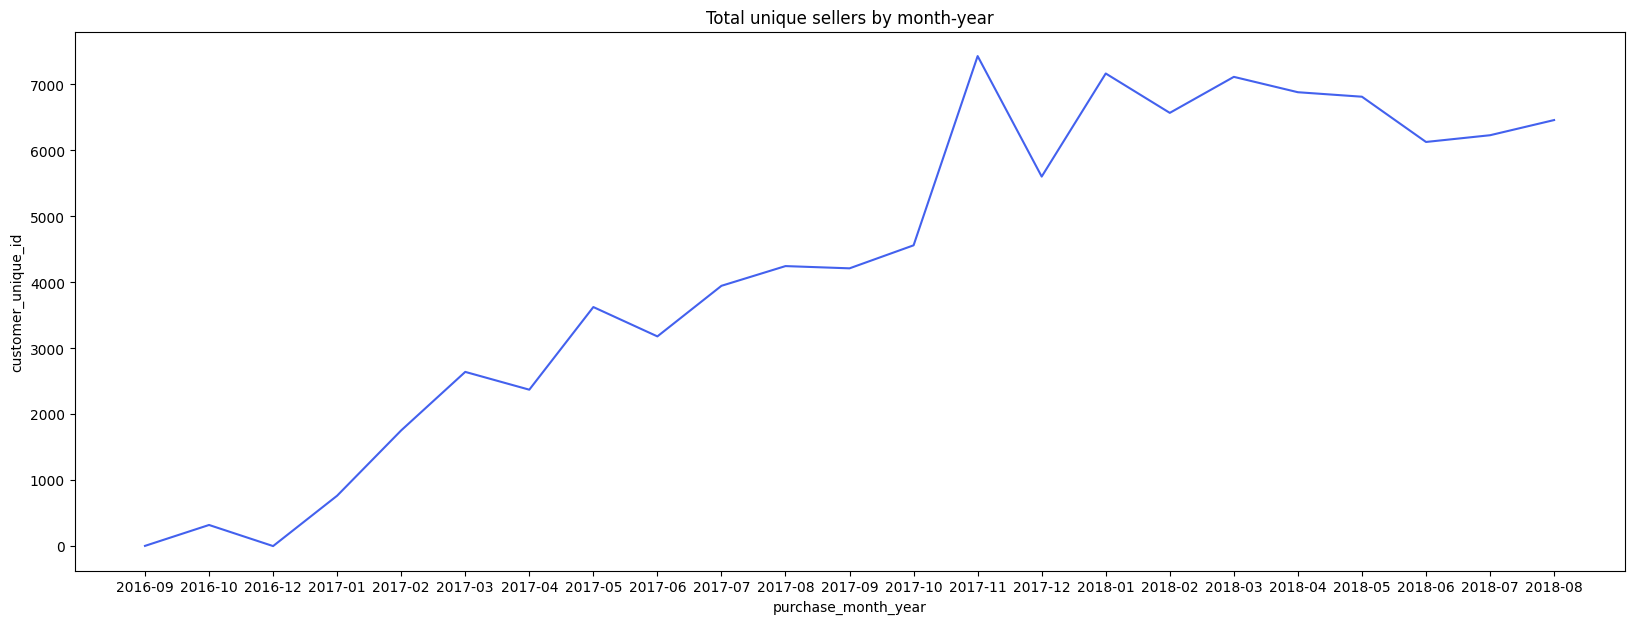

In [100]:
# Total customers by year-months
sell_month_year = merge_data.groupby('purchase_month_year')['customer_unique_id'].nunique().reset_index()
sell_month_year['purchase_month_year'] = sell_month_year['purchase_month_year'].astype('str')
plt.figure(figsize = (20,7))
sns.lineplot(data = sell_month_year,
             x = 'purchase_month_year',
             y = 'customer_unique_id',
             color = '#4361EE')
plt.title("Total unique sellers by month-year")

In [62]:
new_min_sell = merge_data.groupby('seller_id')['order_purchase_timestamp'].min().reset_index()
new_min_sell.columns = ['seller_id','min_sell_month_year']
new_sell = pd.merge(merge_data, new_min_sell, on = 'seller_id')
new_sell['seller_type'] = 'New'
new_sell.loc[new_sell['order_purchase_timestamp'] > new_sell['min_sell_month_year'],'seller_type'] = 'Existing'

Text(0.5, 1.0, 'Type of sellers by year month')

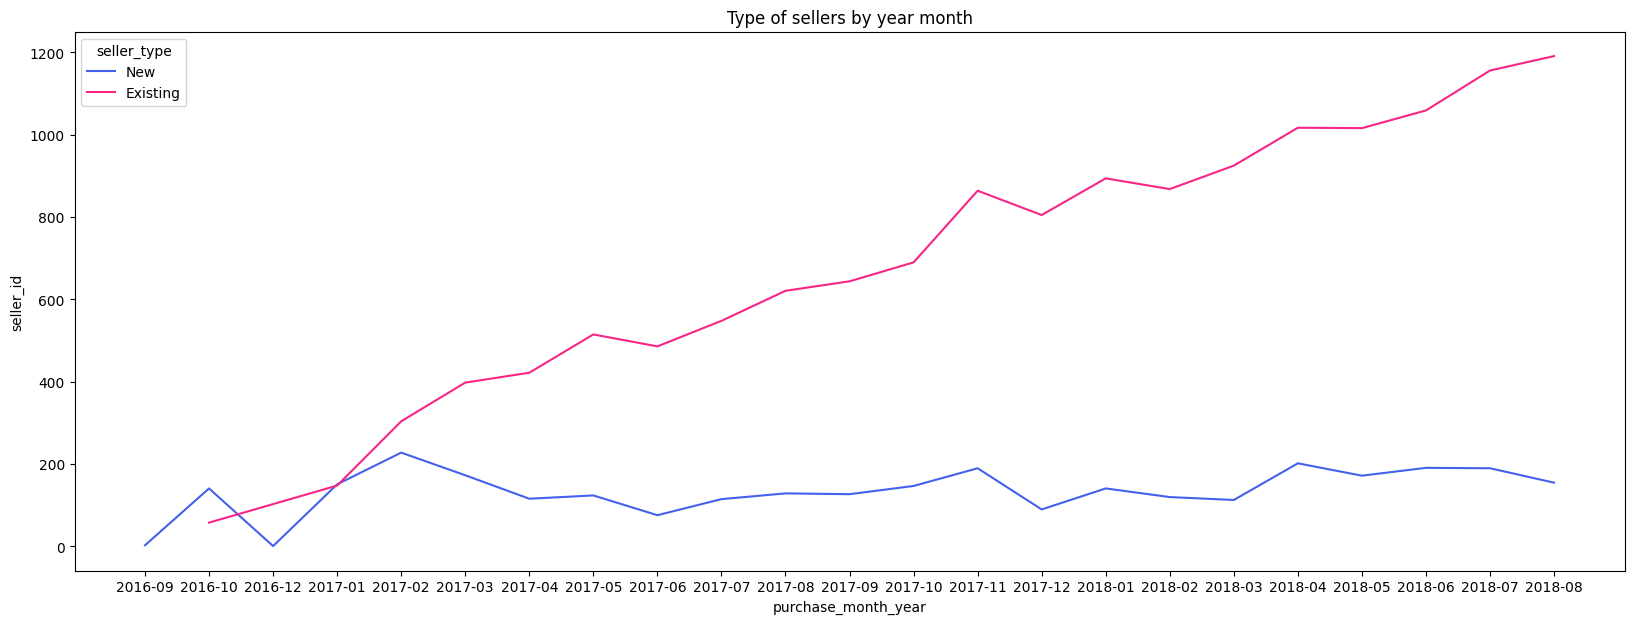

In [102]:
type_sell_month_year = new_sell.groupby(['purchase_month_year','seller_type'],)['seller_id'].nunique().reset_index()
type_sell_month_year['purchase_month_year'] = type_sell_month_year['purchase_month_year'].astype('str')
plt.figure(figsize = (20,7))
sns.lineplot(data = type_sell_month_year,
             x = 'purchase_month_year',
             y = 'seller_id',
             hue = 'seller_type',
             palette=["#4361EE","#F72585"])
plt.title("Type of sellers by year month")

In [64]:
new_sell['seller_type'].value_counts(normalize=True)

Existing    0.967855
New         0.032145
Name: seller_type, dtype: float64

Orders from existing sellers have steadily increased over time, while orders from new sellers have remained relatively stable. This suggests a customer preference for purchasing from existing sellers rather than new ones.

In [65]:
# Review scores for each type of sellers
review_seller = new_sell.groupby('seller_type')['review_score'].mean()
review_seller

seller_type
Existing    4.033130
New         3.979884
Name: review_score, dtype: float64

Existing sellers appear to receive higher review scores compared to new sellers.






### 4.4 Delivery and Review Score

In [66]:
# Calculate the number of days it takes for orders to be delivered to customers
merge_data['delivered_days'] = merge_data['order_delivered_customer_date'] - merge_data['order_purchase_timestamp']
merge_data['delivered_days'] = merge_data['delivered_days'].dt.days

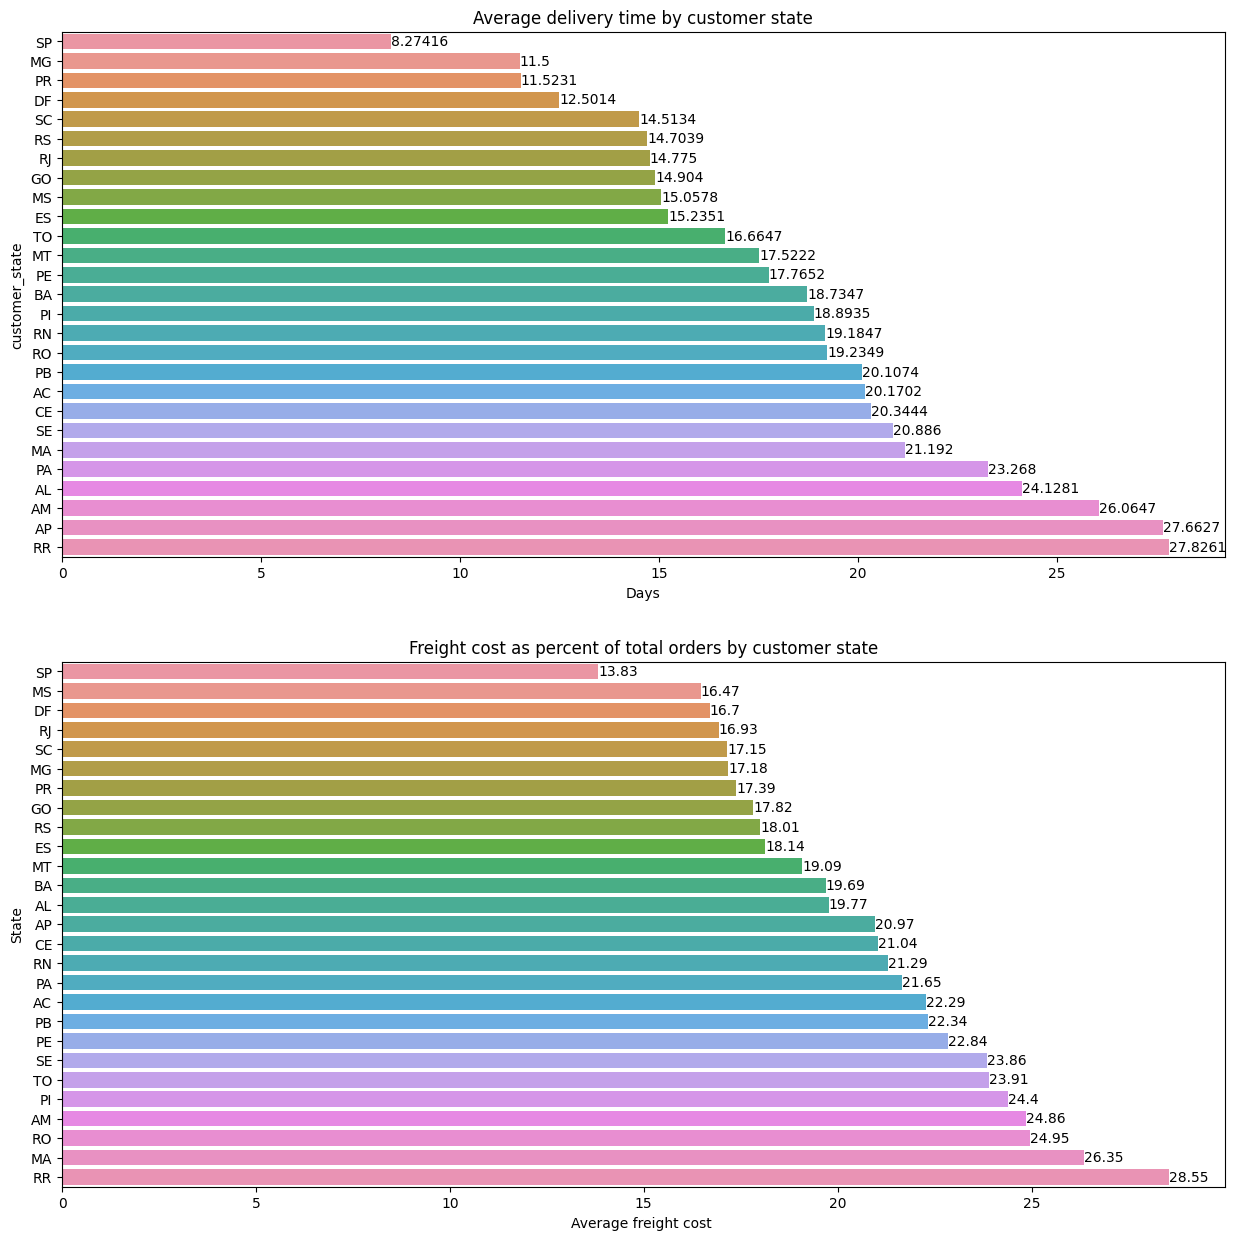

In [103]:
# Calculate average delivery time and freight cost by customer state
avg_delivery_time = merge_data.groupby('customer_state')['delivered_days'].mean().sort_values(ascending=True).reset_index()
freight_cost_percent = merge_data.groupby('customer_state')[['freight_value','price']].agg({'freight_value':'mean','price':'mean'}).sort_values(by='freight_value',ascending=False).reset_index()
freight_cost_percent['freight_ratio'] = round((freight_cost_percent['freight_value'] / freight_cost_percent['price'])*100, 2)
freight_cost_percent = freight_cost_percent.sort_values(by='freight_ratio',ascending=True)

plt.figure(figsize=(15, 15))
sns.set_palette('Spectral', 10)
plt.subplot(211)
bar_plot = sns.barplot(data=avg_delivery_time, x='delivered_days', y='customer_state')
plt.xlabel('Days')
plt.title('Average delivery time by customer state')
for i in bar_plot.containers:
    bar_plot.bar_label(i,)

plt.subplot(212)
bar_plot1 = sns.barplot(data=freight_cost_percent, x='freight_ratio', y='customer_state')
plt.xlabel('Average freight cost ')
plt.ylabel('State')
plt.title('Freight cost as percent of total orders by customer state')
for i in bar_plot1.containers:
    bar_plot1.bar_label(i,)

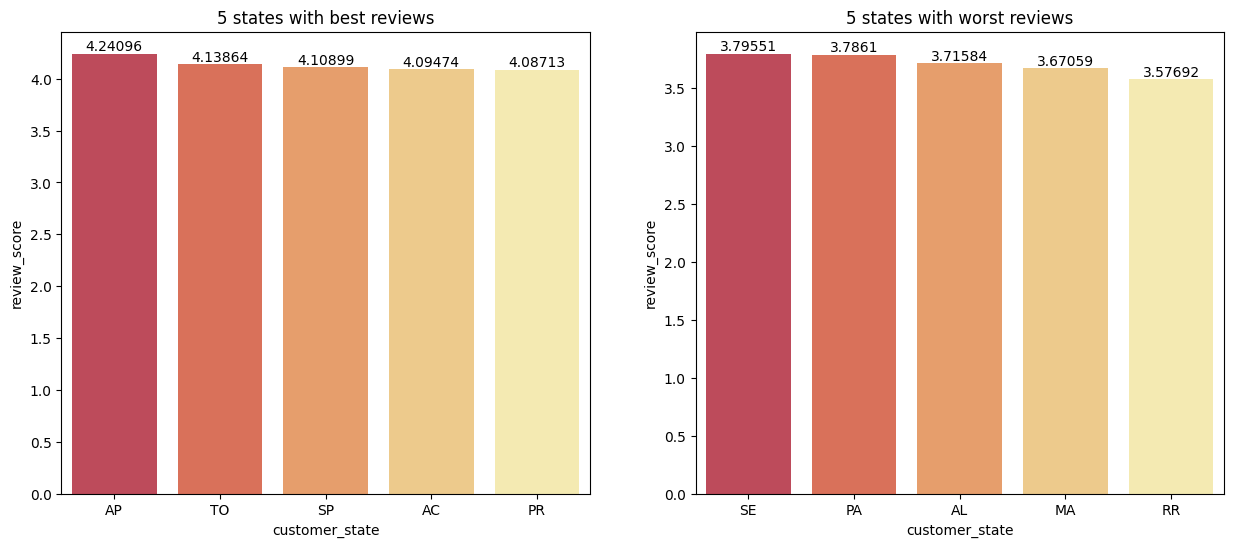

In [68]:
# Review score by state
review_score_by_state = merge_data.groupby('customer_state')['review_score'].mean().reset_index().sort_values(by='review_score',ascending=False)

plt.figure(figsize=(15, 6))

plt.subplot(121)
bar_plot = sns.barplot(data=review_score_by_state.head(5), x='customer_state', y='review_score')

plt.title('5 states with best reviews')
for i in bar_plot.containers:
    bar_plot.bar_label(i,)

plt.subplot(122)
bar_plot1 = sns.barplot(data=review_score_by_state.tail(5), x='customer_state', y='review_score')

plt.title('5 states with worst reviews')
for i in bar_plot1.containers:
    bar_plot1.bar_label(i,)

According to the graphs above, the SP state exhibits a concentration of customers who make frequent and substantial purchases, experience fast delivery times, pay relatively low shipping costs, and overall express satisfaction with the level of service.

In [69]:
# Calculate the variance between the estimated delivery time and the actual delivery time for orders.
merge_data['diff_days'] = merge_data['order_estimated_delivery_date'] - merge_data['order_delivered_customer_date']
merge_data['diff_days'] = merge_data['diff_days'].dt.days

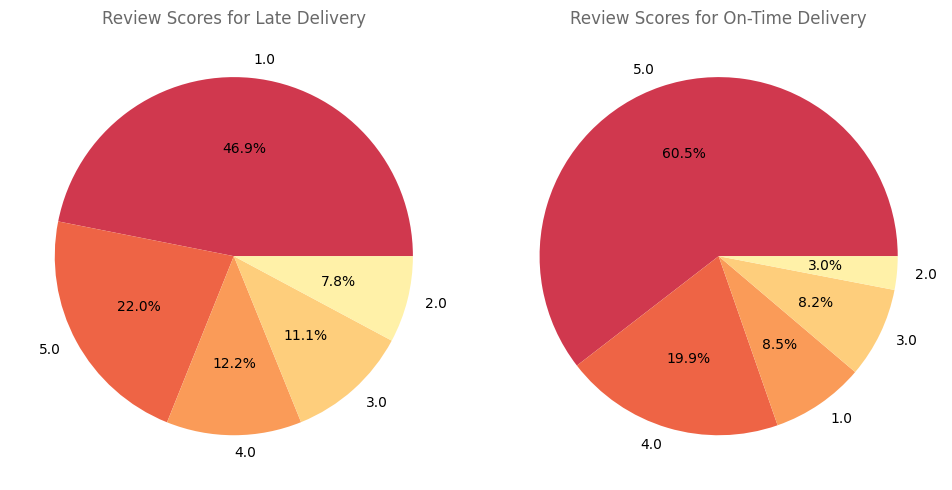

In [70]:
# Review scores for late and on time delivery
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i in range(2):
    data = merge_data[merge_data['diff_days'] < 0] if i == 0 else \
        merge_data[merge_data['diff_days'] >= 0]

    axes[i].pie(
        data['review_score'].value_counts(),
        labels=data['review_score'].value_counts().index,
        autopct='%1.1f%%'
    )
    prompt = 'Late Delivery' if i == 0 else 'On-Time Delivery'
    plt.tight_layout()
    axes[i].set_title(
        f'Review Scores for {prompt}',
        size=12,
        color='dimgrey'
    )

Based on two pie plots above, it can be seen that customers tend to give 1 star rating on late delivery and give 5 star rating On-time delivery

## 5.Summary and recommendations

 Summary:

 * 'bed_bath_table' and 'watches_gifts' are the top popular
product categories with high order volumnes  and relatively low seller competition. This indicates ongoing potential in these categories.

*  The majority of customers are concentrated in SP state, and the ratio of sellers to customers in SP state is relatively low. Additionally, RJ and MG states are also emerging markets that attract attention. Consequently, SP, RJ, and MG are all potential markets for new sellers to explore.

*  Customers tend to make purchases relatively steadily throughout the month but experience a sharp decline towards the end of the month. The purchasing time increase on weekdays and a decrease on weekends and the peak purchasing time is observed between 10 am and 10 pm.

  Notably, customers tend to make more purchases on special days such as Black Friday or Cyber Monday





Recommendations:

*  Conducting a detailed analysis of each category is necessary to select specific products tailored for each state.
*  Monitoring delivery times closely is crucial to prevent negative ratings and enhance competitiveness by reducing delivery times.
*  Aligning marketing campaigns with periods when customers are inclined to make more purchases, especially during special occasions, is crucial. Additionally, implementing promotion programs for existing customers and attracting new ones is essential for customer retention.